In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in historical data and future flows

In [3]:
data_hist = pd.read_excel(r"data/data.xlsx", sheet_name="Historical_series")

In [4]:
data_eflag = pd.read_excel(r"data/data.xlsx", sheet_name="Future_flow")

## Calculate correlation, mean and STD

In [5]:
data_hist.set_index("Date", inplace=True)

### Make data normal (suspected log-normal now)

In [6]:
print(
    data_hist["Quality"].mean(),
    data_hist["Quality"].std(),
    data_hist["Flow"].mean(),
    data_hist["Flow"].std(),
)

16.062138451080912 20.22365029610578 5869.1491487793255 6222.621675398584


In [7]:
data_hist = np.log(data_hist)

Take the log of the data to make it fit a 'normal' distribution

In [8]:
corr = data_hist.corr().loc["Quality"].Flow
mean_wq = data_hist["Quality"].mean()
std_wq = data_hist["Quality"].std()
mean_flow = data_hist["Flow"].mean()
std_flow = data_hist["Flow"].std()

In [10]:
print(
    data_hist["Quality"].mean(),
    data_hist["Quality"].std(),
    data_hist["Flow"].mean(),
    data_hist["Flow"].std(),
    corr
)

2.3641967162595905 0.8492299417355009 8.192208006612121 0.9871367284616774 0.7268123368994925


## Create data

### Example

Here we generate 800 samples from the bivariate normal distribution with mean [0, 0] and covariance matrix [[6, -3], [-3, 3.5]]. The expected variances of the first and second components of the sample are 6 and 3.5, respectively, and the expected correlation coefficient is -3/sqrt(6*3.5) ≈ -0.65465.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [201]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=8000)

In [202]:
pts.mean(axis=0)

array([-0.00480021, -0.01289207])

In [203]:
np.cov(pts.T)

array([[ 6.105728  , -3.10664377],
       [-3.10664377,  3.58377626]])

In [204]:
np.corrcoef(pts.T)[0, 1]

-0.6641287579004141

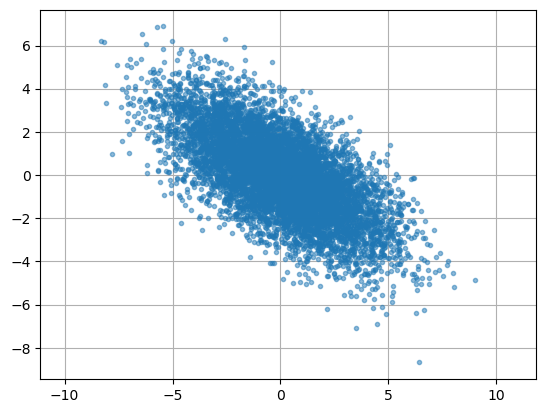

In [205]:
import matplotlib.pyplot as plt

plt.plot(pts[:, 0], pts[:, 1], ".", alpha=0.5)
plt.axis("equal")
plt.grid()
plt.show()

### Using historical data

In [206]:
cov = data_hist.cov().to_numpy()

In [207]:
cov

array([[0.72119149, 0.60929119],
       [0.60929119, 0.97443892]])

In [208]:
pts = np.random.multivariate_normal([mean_wq, mean_flow], cov, size=1000)

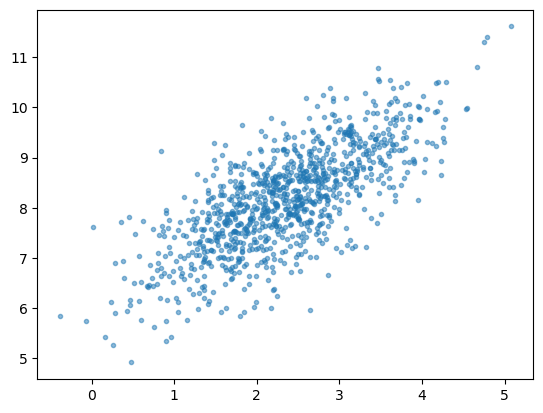

In [209]:
pts = pd.DataFrame(pts)
plt.plot(pts[0], pts[1], ".", alpha=0.5)

In [210]:
pts = np.exp(pts)

In [211]:
pts.mean(axis=0)

0      14.920291
1    5875.822689
dtype: float64

In [212]:
np.cov(pts.T)

array([[2.23782315e+02, 8.70263764e+04],
       [8.70263764e+04, 6.19310332e+07]])

In [213]:
np.corrcoef(pts.T)[0, 1]

0.7392372733850477

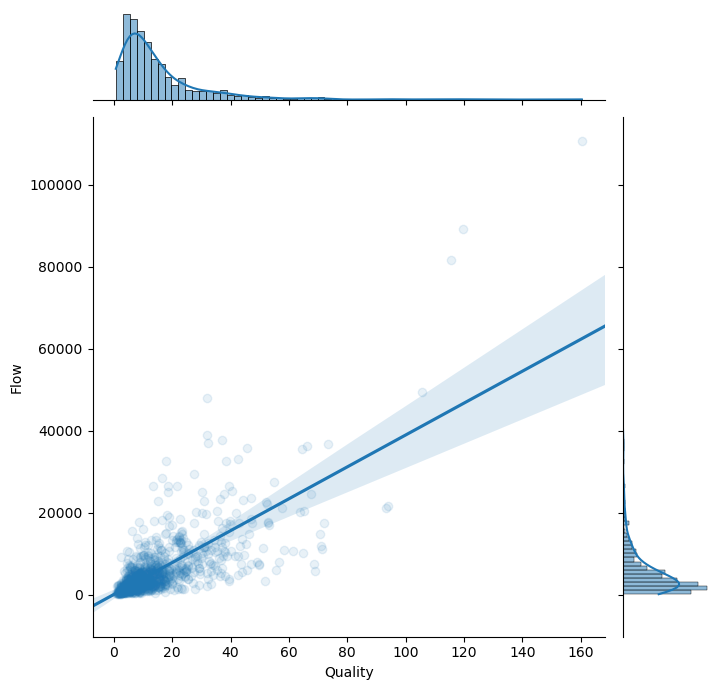

In [217]:
pts.columns = ["Quality", "Flow"]
g = sns.jointplot(
    x="Quality",
    y="Flow",
    data=pts,
    kind="reg",
    truncate=False,
    height=5,
    scatter_kws={"alpha": 0.1},
)

In [218]:
data_hist = np.exp(data_hist)

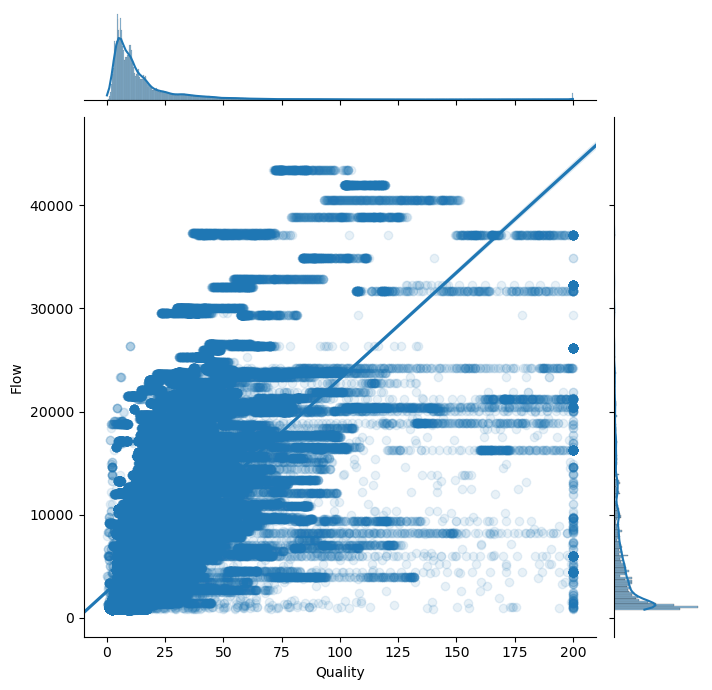

In [219]:
g = sns.jointplot(
    x="Quality",
    y="Flow",
    data=data_hist,
    kind="reg",
    truncate=False,
    height=5,
    scatter_kws={"alpha": 0.1},
)